In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
project_path = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data'

In [3]:
patients_dir = sorted([el for el in os.listdir(project_path) if el.startswith('Patient')])

In [4]:
till_csv = 'VTA_tracts/plot/outcomes/Depression_scales_evolution.csv'

In [5]:
table_dict = {}
baseline_dict = {}

In [6]:
for pat in patients_dir:

    this_pat= {}    
    complete_path = os.path.join(project_path,pat,till_csv)
    df = pd.read_csv(complete_path) #already sorted in time and with values in percentage

    baseline_df = df[df.date == min(df.date)][['measure','value']]
    baseline_dict[pat] = dict(zip(baseline_df.measure,baseline_df.value ))
    this_pat['n_sessions'] = df.date.nunique()-1 #remove preoperative baseline date
    
    
    df['date'] = pd.to_datetime(df.date,format = '%Y-%m-%d')    
    unique_dates_no_bl = np.array(df['date'].unique()[1:])    
    time_between_assessments = np.diff(df['date'].unique()[1:]) / np.timedelta64(1,'D')
    
    # in days
    this_pat['min'] = np.min(time_between_assessments)
    this_pat['max'] = np.max(time_between_assessments)
    this_pat['std'] = np.round(np.std(time_between_assessments),2)
    this_pat['median'] = np.round(np.median(time_between_assessments),2)
    
    # in months
    this_pat['total_coverage(m)'] = np.ceil((unique_dates_no_bl[-1] - unique_dates_no_bl[0])/ np.timedelta64(1,'D')/30)

#     print('min, max, std, mean time between assessments in days')
#     print(np.min(time_between_assessments),np.max(time_between_assessments),np.std(time_between_assessments),np.mean(time_between_assessments))
#     print('distance in month first and last assessment')
#     print((unique_dates_no_bl[-1] - unique_dates_no_bl[0])/ np.timedelta64(1,'D')/30)
#     print()
    table_dict[pat] = this_pat

In [7]:
table_dict

{'Patient1': {'n_sessions': 36,
  'min': 5.0,
  'max': 126.0,
  'std': 25.93,
  'median': 9.0,
  'total_coverage(m)': 25.0},
 'Patient2': {'n_sessions': 2,
  'min': 173.0,
  'max': 173.0,
  'std': 0.0,
  'median': 173.0,
  'total_coverage(m)': 6.0},
 'Patient3': {'n_sessions': 10,
  'min': 6.0,
  'max': 72.0,
  'std': 20.52,
  'median': 23.0,
  'total_coverage(m)': 9.0}}

In [12]:
sessions_df = pd.DataFrame.from_dict(table_dict).T
sessions_df

,n_sessions,min,max,std,median,total_coverage(m)
Patient1,36.0,5.0,126.0,25.93,9.0,25.0
Patient2,2.0,173.0,173.0,0.00,173.0,6.0
Patient3,10.0,6.0,72.0,20.52,23.0,9.0


In [13]:
sessions_df.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  n\\_sessions &    min &    max &    std &  median &  total\\_coverage(m) \\\\\n\\midrule\nPatient1 &        36.0 &    5.0 &  126.0 &  25.93 &     9.0 &               25.0 \\\\\nPatient2 &         2.0 &  173.0 &  173.0 &   0.00 &   173.0 &                6.0 \\\\\nPatient3 &        10.0 &    6.0 &   72.0 &  20.52 &    23.0 &                9.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [10]:
baseline_values = pd.DataFrame.from_dict(baseline_dict)[::-1]
baseline_values


,Patient1,Patient2,Patient3
MADRS,61.67,48.33,48.33
Sheehan,80.00,73.33,NaN
SHAPS,78.57,35.71,57.14
SOFAS,30.00,40.00,30.00
HAMD,43.08,36.92,21.54
BDI,65.08,65.08,49.21
BARS,0.00,0.00,0.00


In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

In [49]:
cmap = plt.cm.tab20
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 40)))
my_colors = dict(zip(np.arange(1,40), rcParams['axes.prop_cycle'].by_key()['color']))

In [50]:
my_colors

{1: array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 2: array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 3: array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 4: array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 5: array([1.        , 0.49803922, 0.05490196, 1.        ]),
 6: array([1.        , 0.49803922, 0.05490196, 1.        ]),
 7: array([1.        , 0.73333333, 0.47058824, 1.        ]),
 8: array([1.        , 0.73333333, 0.47058824, 1.        ]),
 9: array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 10: array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 11: array([0.59607843, 0.8745098 , 0.54117647, 1.        ]),
 12: array([0.59607843, 0.8745098 , 0.54117647, 1.        ]),
 13: array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 14: array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 15: array([1.        , 0.59607843, 0.58823529, 1.        ]),
 16: array([1.        , 0.59607843, 0.58823529, 1.        ]),
 17: array([0.580

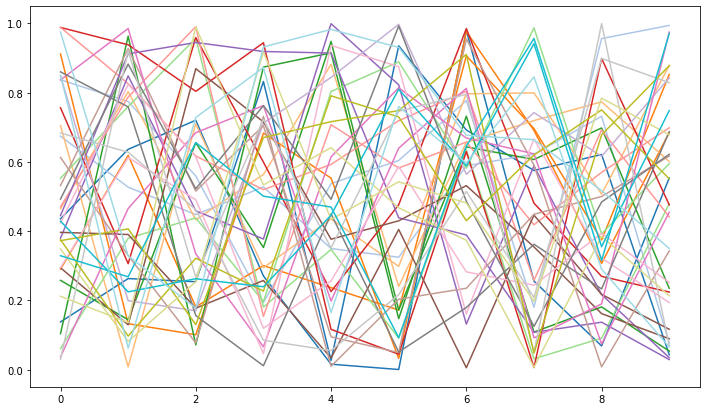

In [28]:
fig, ax2 = plt.subplots(1,1, figsize=(12,7))
ax2.plot(range(10), np.random.random((10, 39)))


In [35]:
cmap = plt.cm.tab20
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 40)))
kk = dict(zip(np.arange(1,41), rcParams['axes.prop_cycle'].by_key()['color']))

In [37]:
rcParams['axes.prop_cycle'].by_key()['color']

[array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([1.        , 0.73333333, 0.47058824, 1.        ]),
 array([1.        , 0.73333333, 0.47058824, 1.        ]),
 array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 array([0.59607843, 0.8745098 , 0.54117647, 1.        ]),
 array([0.59607843, 0.8745098 , 0.54117647, 1.        ]),
 array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 array([1.        , 0.59607843, 0.58823529, 1.        ]),
 array([1.        , 0.59607843, 0.58823529, 1.        ]),
 array([0.58039216, 0.40392157, 0.74117647, 1.        ]),
 array([0.5803

In [44]:
color = plt.cm.viridis(np.linspace(0, 1,40))
rcParams['axes.prop_cycle'] = cycler('color', color)

kk1 = dict(zip(np.arange(1,41), rcParams['axes.prop_cycle'].by_key()['color']))

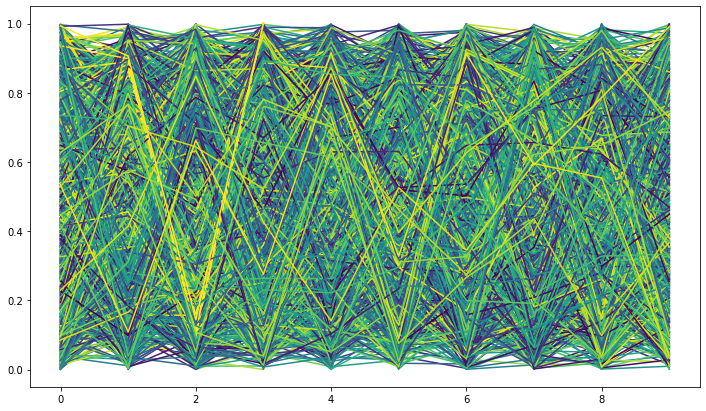

In [45]:
fig, ax2 = plt.subplots(1,1, figsize=(12,7))
for i in np.arange(1,41):
    ax2.plot(range(10), np.random.random((10, 39)), kk1[i])